Camera Calibration
------------------

**1. Briefly state how you computed the camera matrix and distortion coefficients. Provide an example of a distortion corrected calibration image.**
The code to compute the camera matrix and distortion coefficients can be found in calibrate.py.
I computed the camera matrix and distortion coefficients using the following process:
1. Import the images
2. Find chessboard corners using: cv2.findChessboardCorners(gray, (9, 6), None)
3. Calculate camera matrix and distortion coefficients using: cv2.calibrateCamera(obj_points, img_points, gray.shape[::-1],None,None)
4. Save coeffients to camera_coefficients.pickle

Pipeline (Images)
----------

**1. Provide an example of a distortion-corrected image.**

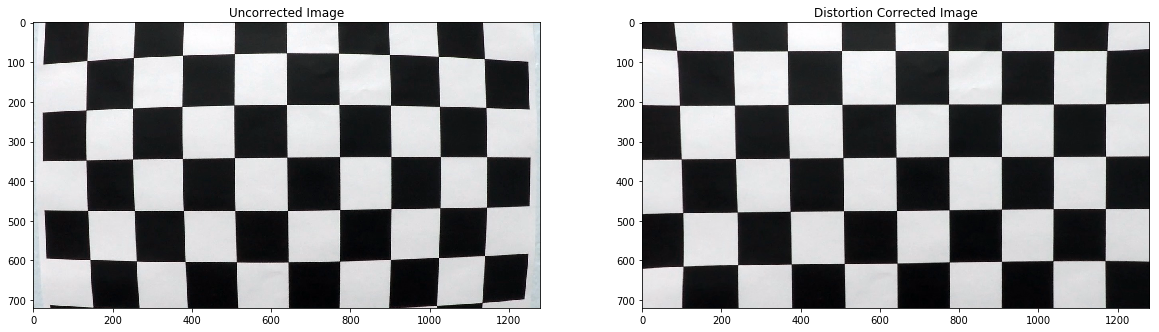

In [12]:
import pickle
%matplotlib inline 
# load coefficients
with open('camera_coefficients.pickle', 'rb') as f:  # Python 3: open(..., 'wb')
    mtx, dist, rvecs, tvecs = pickle.load(f)
name = "./camera_cal/calibration1.jpg"
img = cv2.imread(name)
dst = cv2.undistort(img, mtx, dist, None, mtx)

plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.imshow(img)
plt.title('Uncorrected Image')
plt.subplot(1,2,2)
plt.imshow(dst)
plt.title('Distortion Corrected Image')

**2. Describe how (and identify where in your code) you used color transforms, gradients or other methods to create a thresholded binary image. Provide an example of a binary image result.**
The code that uses color transforms and gradients is in the functions "hls_select" and "sobel_thresh". in detect_lanelines.py.The function "sobel_thresh" combutes binary images using a variety of different threshold tecniques including:
    - Axis-specific gradient thresholding (sabel_x,sabel_y): This thresholding only selects regions of the image that have a gradient in x or y within threshold limits
    - Gradient magnitude thresholding (sabel_mag): This thresholding computes the total gradient (sqrt(grad_x^2, grad_y^2)) and only selects the regio of the images whos total gradient is within thresholds
    -  Gradient direction thresholding (sabel_dir: this thresholding computes the gradient direction (np.arctan2(grad_y/grad_x)) and only seleccts regions of the image who's gradient direction is within a threshold.
    
The hls_select coverts the color representation to hls and only selects regions of the image who's saturation value is within a threwhold

All of these threshold tecniques were applied to the image seperately, and the binary images are combined to find to accurately select the regions of interest. Specifically, they are combined as follows:

(sabel_x & sabel_y) | (sabel_mag & sabel_dir) | hls_select

Please see the image below for the result of this thresholding


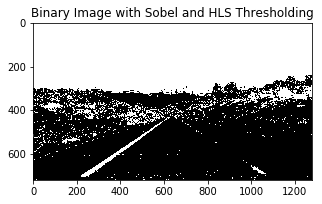

In [18]:
exec(open("./detect_lanelines.py").read())
name = "./test_images/straight_lines1.jpg"
img = cv2.imread(name)
binary_combined, warped_image = detect(img)
plt.figure(figsize = (5,5))
plt.imshow(binary_combined, cmap='gray')
plt.title('Binary Image with Sobel and HLS Thresholding')
plt.show(block = False)

**3. Describe how (and identify where in your code) you performed a perspective transform and provide an example of a transformed image.**
The code that computes the perspective transform is in a function called "warper"


**4. Describe how (and identify where in your code) you identified lane-line pixels and fit their positions with a polynomial?**

**5. Describe how (and identify where in your code) you calculated the radius of curvature of the lane and the position of the vehicle with respect to center.**

**6. Provide an example image of your result plotted back down onto the road such that the lane area is identified clearly.**

Pipeline (video)
--------

**1. Provide a link to your final video output. Your pipeline should perform reasonably well on the entire project video (wobbly lines are ok but no catastrophic failures that would cause the car to drive off the road!)**

Discussion
--------

**1. Briefly discuss any problems / issues you faced in your implementation of this project. Where will your pipeline likely fail? What could you do to make it more robust?**